Z->mumu Events =  9200601.0
Z->tautau Events =  247016.0


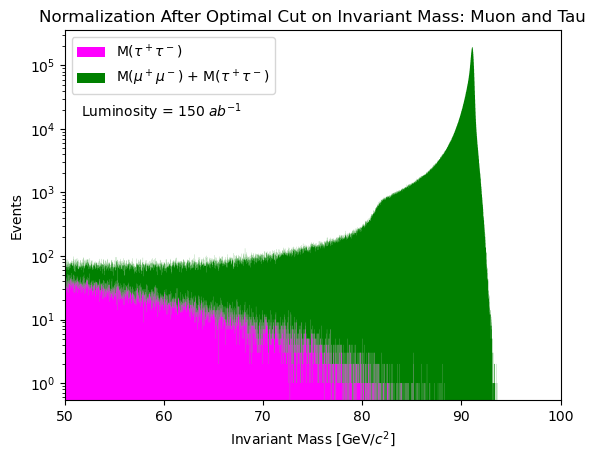

In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math

f = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_xsec_example.root")
f.keys()

h = f['p8_ee_Zmumu_ecm91/m_inv;1']
htau = f['p8_ee_Ztautau_ecm91/m_inv;1']

hep.histplot([htau,h], stack=True, label = [r"M($\tau^+ \tau^-$)", r"M($\mu^+ \mu^-$) + M($\tau^+ \tau^-$)"], 
             color = ["magenta", "green"], histtype = "fill")
plt.yscale("log")
plt.xlim(50,100)
plt.title("Normalization After Optimal Cut on Invariant Mass: Muon and Tau")
plt.legend(loc = "upper left")
plt.xlabel(r"Invariant Mass [GeV/$c^2$]")
plt.ylabel("Events")
plt.figtext(0.15, 0.7, r"Luminosity = 150 $ab^{-1}$")
#plt.savefig("autonorm_inv_mass_Z_mumu_tau_tau_filtermass_no.png")

y,x = h.to_numpy()
ytau,xtau = htau.to_numpy()

print("Z->mumu Events = ", sum(y))
print("Z->tautau Events = ", sum(ytau))

Text(0.0, 1.0, 'FCC-ee simulation')

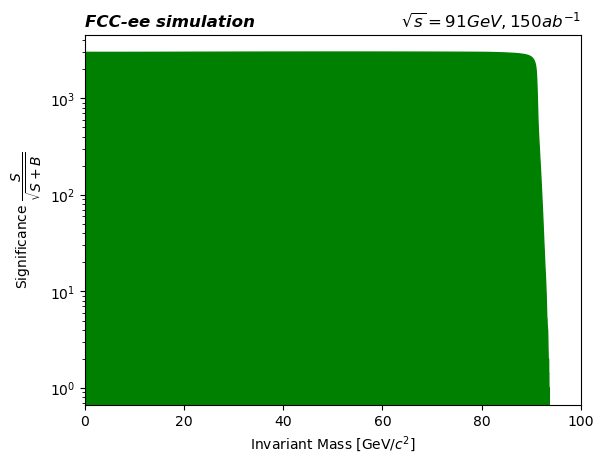

In [18]:
hist = h.to_hist()
xhist = hist.axes[0].centers
yhist = hist.values()

histtau = htau.to_hist()

xhisttau = histtau.axes[0].centers
yhisttau = histtau.values()

newx = []
newy = []

for i in xhist:
    s = hist[i*1.0j:].sum()
    b = histtau[i*1.0j:].sum()
    if s.value+b.value < 0.0000000001:
        newy.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        newy.append(ratio)

plt.stackplot(xhist,newy, color = "green")
plt.yscale("log")
plt.xlim(0,100)
plt.xlabel(r"Invariant Mass [GeV/$c^2$]")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
#plt.savefig("images/significance_inv_mass_cut_filterno.png")

In [4]:
optmize = max(newy)
index = np.argmax(newy)
cut = xhist[index]

print(optmize)
print(cut)

3017.7322466853657
51.652499999999996


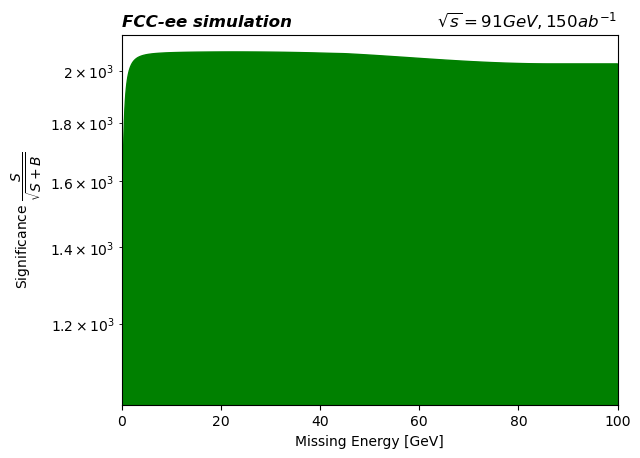

In [16]:
emu = f['p8_ee_Zmumu_ecm91/emiss;1'].to_hist()
etau = f['p8_ee_Ztautau_ecm91/emiss;1'].to_hist()

xemu = emu.axes[0].centers
yemu = emu.values()

xetau = etau.axes[0].centers
yetau = etau.values()

sig = []

for i in range(1,len(xemu)+1):
    s = emu[:i].sum()
    b = etau[:i].sum()
    if s.value+b.value < 0.0000001:
        sig.append(0)
    else:
        ratio = s.value/math.sqrt(s.value+b.value)
        sig.append(ratio)

plt.stackplot(xemu,sig, color = "green")
plt.yscale("log")
plt.xlim(0,100)
plt.xlabel("Missing Energy [GeV]")
plt.ylabel(r"Significance $\dfrac{S}{\sqrt{S+B}}$")
plt.title(r"$\sqrt{s} = 91 GeV, 150 ab^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold", style = "italic")
plt.savefig("images/significance_emiss_cut_filterno.png")

In [6]:
optmize = max(sig)
index = np.argmax(sig)
cut = xemu[index]

print(optmize)
print(cut)

2077.508965250799
22.45
